# $\textit{Embeddings}$

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

tnews = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))

In [3]:
pprint(tnews.keys())
pprint(tnews.target_names)
pprint(tnews.target)
pprint(tnews.target.shape)
pprint(tnews.filenames.shape)
pprint(tnews.data[1])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
array([7, 4, 4, ..., 3, 1, 8])
(11314,)
(11314,)
('A fair number of brave souls who upgraded their SI clock oscillator have\n'
 'shared their experiences for this poll. Please send a brief message '
 'detailing\n'
 'your experiences with the procedure. Top speed attained, CPU rated speed,\n'
 'add on cards and adapters, heat sinks, hour of usage per day, floppy disk\n'
 'functionality with 800 and 1.4 m floppies are especially requested.\n'
 '\n'
 'I will be summarizing in the next two days, so please add to the n

$\textit{TFIDF/CV - Matriz DT}$

In [4]:
tfidf1 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
tfidf2 = TfidfVectorizer(ngram_range=(1,2), stop_words="english")
cv1 = CountVectorizer(ngram_range=(1,1), stop_words="english")
cv2 = CountVectorizer(ngram_range=(1,2), stop_words="english")

vectorization1 = tfidf1.fit_transform(tnews.data)
vocabulary1 = tfidf1.get_feature_names_out()
vectorization2 = tfidf2.fit_transform(tnews.data)
vocabulary2 = tfidf2.get_feature_names_out()

vectorization3 = cv1.fit_transform(tnews.data)
vocabulary3 = cv1.get_feature_names_out()
vectorization4 = cv2.fit_transform(tnews.data)
vocabulary4 = cv2.get_feature_names_out()

Las vectorizaciones devuelven para cada fila (un documento) la repeticion de cada termino del vocabulario

In [5]:
pprint(vectorization1)
pprint(vocabulary1[17000:17010])
print(vectorization3[:2]) #Agarro los primeros 2 documentos y sus repeticiones de terminos
print(vocabulary1[25717])

<11314x101322 sparse matrix of type '<class 'numpy.float64'>'
	with 755809 stored elements in Compressed Sparse Row format>
array(['adv21', 'advacne', 'advanage', 'advance', 'advanced',
       'advancement', 'advancements', 'advances', 'advancing',
       'advantage'], dtype=object)
  (0, 96879)	1
  (0, 37256)	1
  (0, 25717)	4
  (0, 80420)	1
  (0, 31927)	1
  (0, 34741)	1
  (0, 84312)	1
  (0, 57247)	1
  (0, 55606)	1
  (0, 9843)	1
  (0, 35902)	1
  (0, 11174)	1
  (0, 25437)	1
  (0, 24108)	1
  (0, 34742)	1
  (0, 76269)	1
  (0, 83208)	1
  (0, 16806)	1
  (0, 24583)	1
  (0, 81450)	1
  (0, 77676)	1
  (0, 23430)	1
  (0, 54493)	1
  (0, 87913)	1
  (0, 62594)	1
  :	:
  (1, 30233)	1
  (1, 75904)	1
  (1, 16791)	2
  (1, 25769)	1
  (1, 16776)	1
  (1, 45997)	1
  (1, 82666)	1
  (1, 47310)	1
  (1, 92588)	1
  (1, 40727)	1
  (1, 34011)	1
  (1, 41836)	1
  (1, 12266)	1
  (1, 40725)	1
  (1, 37867)	1
  (1, 77460)	1
  (1, 86076)	1
  (1, 31942)	1
  (1, 65377)	1
  (1, 54504)	1
  (1, 21688)	1
  (1, 92386)	1
  (1, 

Similitud coseno entre los primeros 10 documentos del corpus representados como vectores CV o TFIDF

<Axes: >

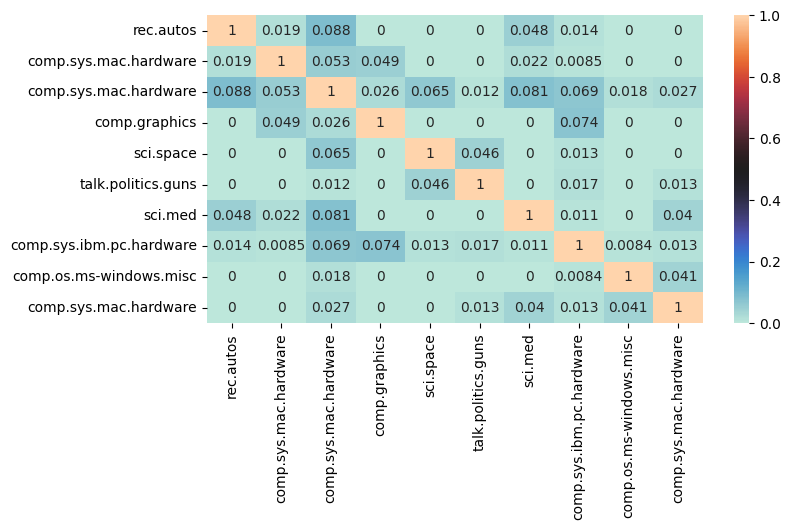

In [6]:
matTest = cosine_similarity(vectorization3[:10])

names = [tnews.target_names[i] for i in tnews.target[:10]]

fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(matTest, annot=True, 
            xticklabels=names,
            yticklabels=names,
            ax=ax,
            cmap="icefire")

Lo mismo que antes pero vemos las diferencias entre CV y TFIDF

<Axes: >

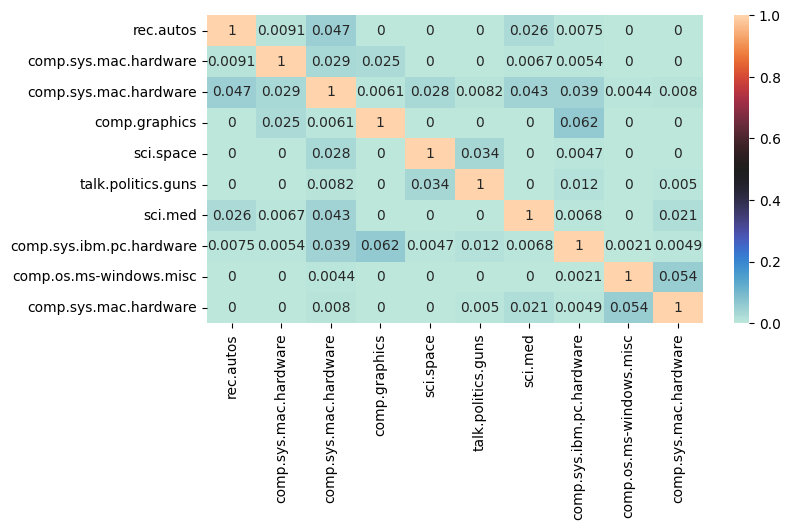

In [7]:
matTest = cosine_similarity(vectorization1[:10])

names = [tnews.target_names[i] for i in tnews.target[:10]]

fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(matTest, annot=True, 
            xticklabels=names,
            yticklabels=names,
            ax=ax,
            cmap="icefire")

In [14]:
def getSimilarity(vectors, ref):
    
    # Hacemos un diccionario para agrupar los articulos por categoria
    articles_by_category = {}
    matriz_similaridad = cosine_similarity(vectors)
    for i, category in enumerate(tnews.target_names):
        
        #Obtenemos los articulos de la caterogia i
        category_articles = np.array([[tnews.data[j], j] for j in range(len(tnews.data)) if tnews.target[j] == i])
        articles_by_category[category] = category_articles #Creamos un diccionario con k:num_categoria v:mat textos

    #Agarramos los indices de todos los documentos que pertenecen a la cat de referencia
    articles_ref = articles_by_category[ref][..., 1] #Los indices de los art de la clase ref
    articles_diff = range(len(vocabulary1))
    articles_diff = np.setdiff1d(articles_diff, articles_ref)
    
    reference_article = int(random.choice(articles_ref)) #Agarramos el indice de un doc aleatorio entre los de referencia

    same = [matriz_similaridad[reference_article, int(art_same)] for art_same in articles_ref if int(art_same) != reference_article]
    diff = [matriz_similaridad[reference_article, int(art_diff)] for art_diff in articles_diff]
    #diff = [matriz_similaridad[reference_article, int(art_diff)] for art_diff in articles_ref if int(art_diff) != articles_ref]
    
    return same, diff

same1, diff1 = getSimilarity(vectorization1, 'sci.space')
#same2, diff2 = getSimilarity(vectorization2, 'sci.space')
#same3, diff3 = getSimilarity(vectorization3, 'sci.space')
#same4, diff4 = getSimilarity(vectorization4, 'sci.space')

MemoryError: Unable to allocate 15.2 GiB for an array with shape (101915,) and data type <U39971

In [ ]:
def histComp(docs1, docs2, text1, text2):
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

    plt.subplot(2, 2, 1)
    plt.hist(docs1, edgecolor='black', bins=25, density=True, log=False)
    plt.xlabel('SimCos')
    plt.ylabel('Frequency')
    plt.title(text1)

    plt.subplot(2, 2, 2)
    plt.hist(docs2, edgecolor='black', bins=25, density=True, log=False)
    plt.xlabel('SimCos')
    plt.ylabel('Frequency')
    plt.title(text2)

    plt.show()

Como es de esperar, los articulos de otras categorias tienen menos similitud coseno que los articulos del mismo tipo.

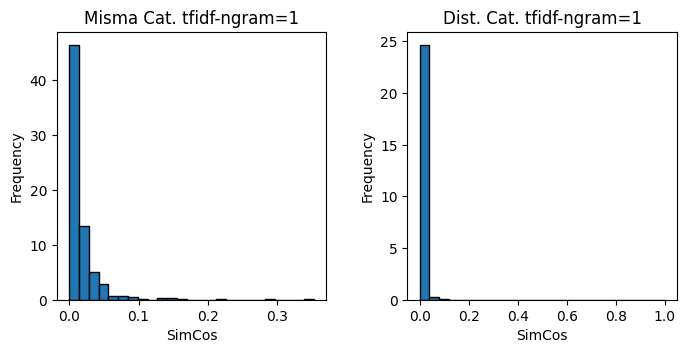

In [ ]:
histComp(same1, diff1, 'Misma Cat. tfidf-ngram=1', 'Dist. Cat. tfidf-ngram=1')

Como la vectorizacion TFIDF penaliza las palabras que aparecen muchas veces en el corpus, se interpreta que los resultados son los esperados, ya que la similitud coseno entre los documentos de la misma categoria usando este metodo son menor en comparacion a la vectorizacion CV.

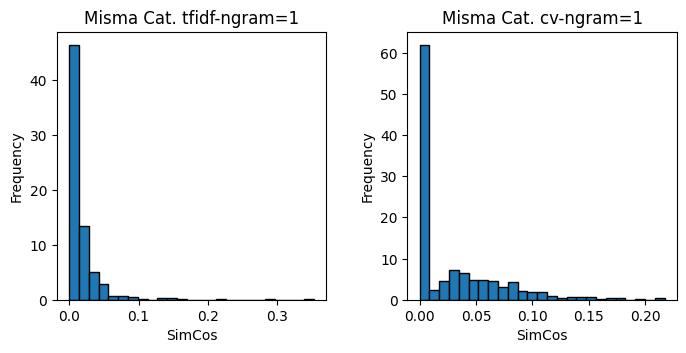

In [ ]:
histComp(same1, same3, 'Misma Cat. tfidf-ngram=1', 'Misma Cat. cv-ngram=1')

Se observo que al agrandar los n_gramas de 1 a 1 y 2, la similitud entre textos de del mismo tipo es mayor.

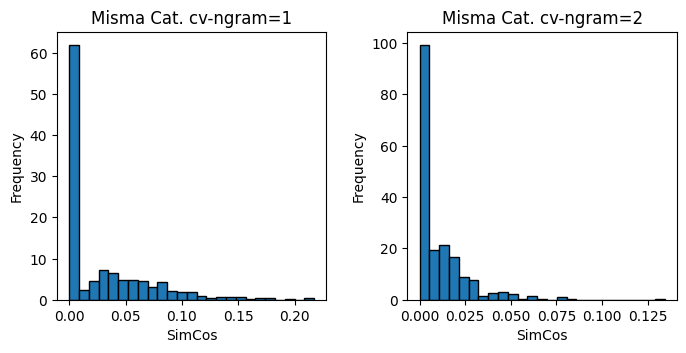

In [ ]:
histComp(same3, same4, 'Misma Cat. cv-ngram=1', 'Misma Cat. cv-ngram=2')

Contrariamente, se observo que al agrandar los n_gramas de 1 a 1 y 2, la similitud entre textos de distinto tipo es menor.

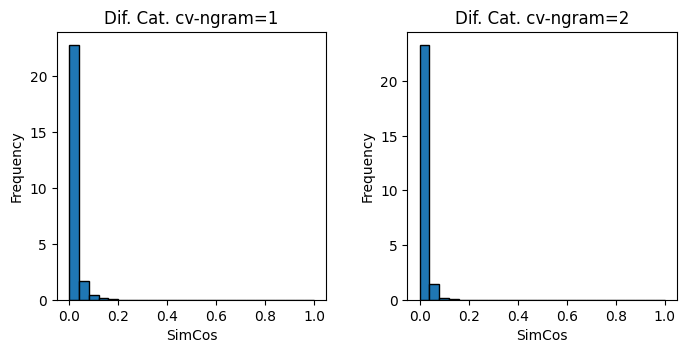

In [ ]:
histComp(diff3, diff4, 'Dif. Cat. cv-ngram=1', 'Dif. Cat. cv-ngram=2')

$\textit{Ahora con TSVD}$

Generamos con TSVD una representacion en baja dimensionalidad de los vectores que representan a los documentos

In [ ]:
svd = TruncatedSVD(n_components=32)
svd.fit(vectorization1)
transformed = svd.transform(vectorization1)
transformed.shape

(11314, 32)

Se observa en el heatmap que en esta nueva representacion existen documentos que claramente se asemejan mas entre ellos (como un documento de comp.sys.mac.hardware con otro de la misma categoria) y documentos que parecerian a tender a ser opuestos (como sci.space y comp.graphics).

<AxesSubplot:>

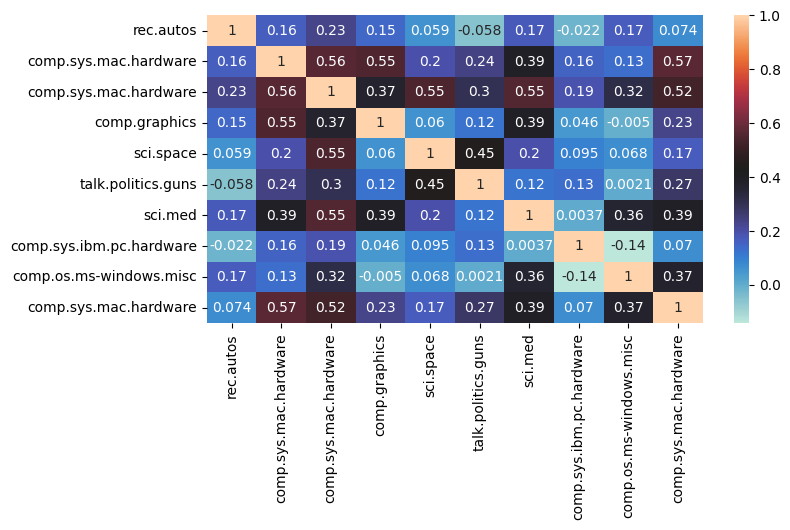

In [ ]:
mat = cosine_similarity(transformed[:10])

names = [tnews.target_names[i] for i in tnews.target[:10]]

fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(mat, annot=True, 
            xticklabels=names,
            yticklabels=names,
            ax=ax,
            cmap="icefire")

In [ ]:
same1svd, diff1svd = getSimilarity(transformed, 'sci.space')
same2svd, diff2svd = getSimilarity(transformed, 'sci.space')
same3svd, diff3svd = getSimilarity(transformed, 'sci.space')
same4svd, diff4svd = getSimilarity(transformed, 'sci.space')

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_9232\1288548925.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  diff = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_ref]
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_9232\1288548925.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  diff = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_ref]
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_9232\1288548925.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  diff = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_ref]
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_9232\1

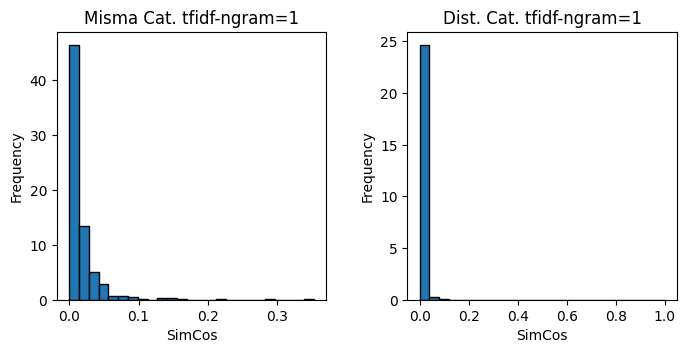

In [ ]:
histComp(same1, diff1, 'Misma Cat. tfidf-ngram=1', 'Dist. Cat. tfidf-ngram=1')

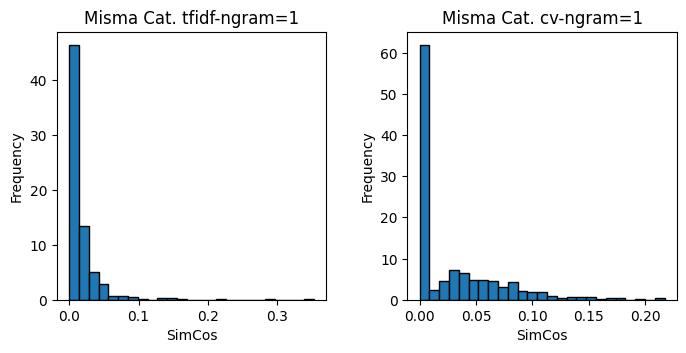

In [ ]:
histComp(same1, same3, 'Misma Cat. tfidf-ngram=1', 'Misma Cat. cv-ngram=1')

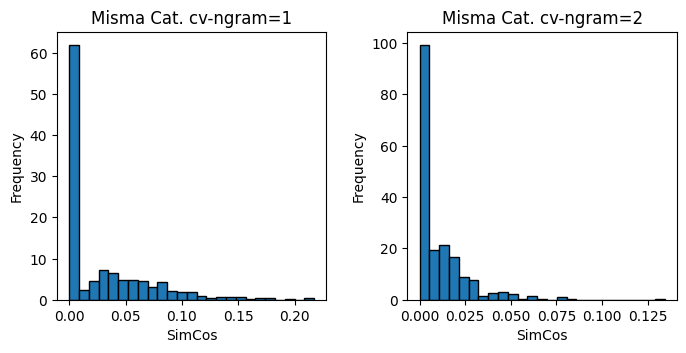

In [ ]:
histComp(same3, same4, 'Misma Cat. cv-ngram=1', 'Misma Cat. cv-ngram=2')

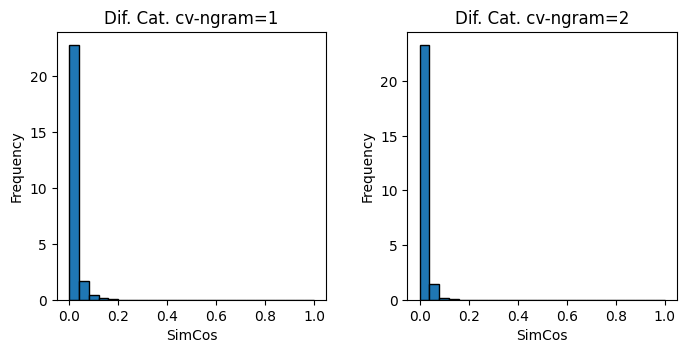

In [ ]:
histComp(diff3, diff4, 'Dif. Cat. cv-ngram=1', 'Dif. Cat. cv-ngram=2')

$\textit{Matriz TD}$

In [ ]:
termDocMat = vectorization1.transpose()
termDocMat

<101322x11314 sparse matrix of type '<class 'numpy.float64'>'
	with 755809 stored elements in Compressed Sparse Column format>

Se observa como es de esperar que palabras similares tiene una similitud coseno mayor que aquellas menos relacionadas

<AxesSubplot:>

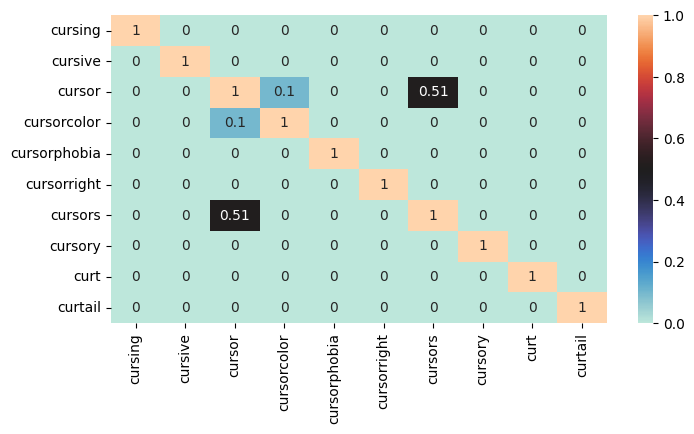

In [ ]:
fromI = 31000

matTermDocSim = cosine_similarity(termDocMat[fromI:fromI+10])

names = vocabulary1[fromI:fromI+10]

fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(matTermDocSim, annot=True, 
            xticklabels=names,
            yticklabels=names,
            ax=ax,
            cmap="icefire")

$\textit{Matriz TC}$

In [ ]:
# Create a term-class sparse matrix
from scipy.sparse import lil_matrix, coo_matrix

termClassMat = lil_matrix((len(vocabulary3), len(tnews.target_names)), dtype=np.float32)
cx = coo_matrix(vectorization3)

# Populate the term-class matrix
for i,j,v in zip(cx.row, cx.col, cx.data):
    class_i = tnews.target[i]
    termClassMat[j, class_i] += v


Obtenemos una representacion de cada termino en funcion de los documentos

In [ ]:
print(termClassMat.shape)

(101322, 20)


<AxesSubplot:>

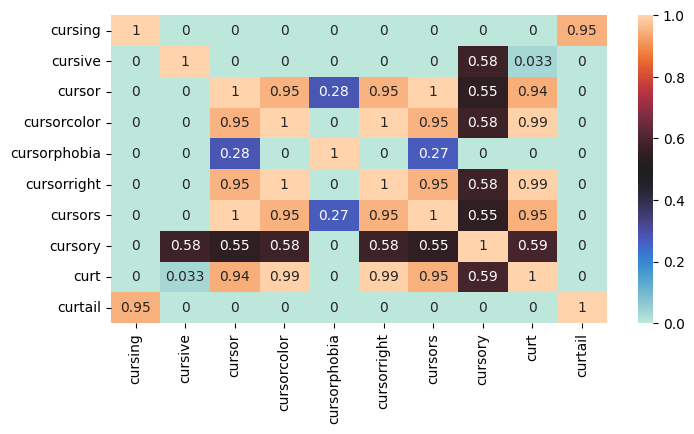

In [ ]:
fromI = 31000

matTermClassSim = cosine_similarity(termClassMat[fromI:fromI+10])
names = vocabulary3[fromI:fromI+10]

fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(matTermClassSim, annot=True, 
            xticklabels=names,
            yticklabels=names,
            ax=ax,
            cmap="icefire")

$\textit{Matriz TT}$

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import make_sampling_table, skipgrams

In [ ]:
token = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    analyzer=None
)

token.fit_on_texts(tnews.data) #Tokeniza y cuenta las palabras que mas aparecen, definiendo un vocabulario.

In [ ]:
train_sequences = token.texts_to_sequences(tnews.data) #Pasamos los textos a una secuencia de numeros que indican la posicion en el vocabulario

In [ ]:
index = 21
print(len(train_sequences[index]))
print(train_sequences[index])
print(tnews.data[index])

94
[7, 95, 10, 1036, 13316, 26, 1, 3182, 4, 1, 3919, 71, 47, 212, 3226, 3, 1, 2190, 90, 844, 3685, 32862, 1, 3182, 4, 1, 2190, 71, 47, 212, 3226, 3, 1128, 19, 1057, 1861, 12, 1135, 46614, 6, 248, 1987, 4, 1, 2190, 7, 182, 10, 9214, 20113, 26, 70, 3182, 3976, 7265, 1, 89, 168, 91, 2936, 25, 7, 95, 47, 889, 1767, 1, 16497, 464, 15, 71, 47, 26, 3226, 3, 1, 1724, 712, 1480, 4, 265, 4507, 26, 1, 3182, 4, 1, 4508, 186, 47, 26, 3226, 844, 47]

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


In [ ]:
vocab_size = len(token.word_index)
#token.word_index

In [ ]:
sampling_table = make_sampling_table(vocab_size, sampling_factor=1e-05) #Me devuelve la probabilidad de que tan relevante es la palabra

In [ ]:
t = 100
print(sampling_table[t])
print(list(token.word_index)[t:t+10])

0.0720219539630435
['e', 'new', 'should', "it's", 'could', 'b', 'well', 'good', 'v', 'because']


In [ ]:
data, labels = skipgrams(
    sequence=train_sequences[5],
    vocabulary_size=vocab_size,
    window_size=1,
    negative_samples=0,
    categorical=False,
    sampling_table=sampling_table,
    seed=None
) #Obtenemos los pares agarrando el central con todos los demas terminos que entren dentro de window_size

In [ ]:
print(data[:4])
for i in range(len(data[:4])):
    print(list(token.word_index)[data[i][0]], list(token.word_index)[data[i][1]])


[[2933, 3305], [14, 1344], [32820, 16], [1670, 32820]]
supporting duo
on developed
debra are
treatment debra
